# Projekt 1
---


# Analiza dla 64 cech 
--- 

In [19]:
from sklearn import metrics

def classifier_test(classifier_model, X_train, X_test, y_train, y_test):
    """
    Classifier testing function

    Args:
        classifier_model (class): Classifier class
        X_train (np.ndarray): Training set
        X_test (np.ndarray): Testing set
        y_train (np.ndarray): Training target
        y_test (np.ndarray): Testing target

    Returns:
        [acc, cm] (list): _description_
    """

    # Uczenie modelu
    classifier_model.fit(X_train, y_train)
    
    # Predykcja
    y_pred = classifier_model.predict(X_test)
    
    # Jakość klasyfikacji
    acc = metrics.accuracy_score(y_test, y_pred)

    # Macierz pomyłek
    cm = metrics.confusion_matrix(y_test, y_pred, labels=classifier_model.classes_)

    return acc, cm
    

## Configuration section
---
Here you should specify: 
- number of iteration `N_ITER`
- test size array `TEST_SIZE`
- classificators used to test `CLASSIFIERS`, and for titles `CLASSIFIERS_DOCSTR`



In [22]:
# Import all required classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

TEST_SIZE = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Testing `test_size` parameter
N_ITER = 2                                              # Number of iterations for all tests

# Classifiers
K_NEIGHBORS = [1,3,5,7,13]
CLASSIFIERS = [
    GaussianNB(), 
    LinearDiscriminantAnalysis(), 
    QuadraticDiscriminantAnalysis(),
    NearestCentroid(),
    SVC(),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[0]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[1]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[2]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[3]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[4]),
    ]

CLASSIFIERS_DOCSTR = [
    "Gaussian NB",
    "Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis",
    "Nearest Centroid",
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[0]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[1]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[2]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[3]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[4]),
    "SVC"
]

## Run section
---
Here you can run simlations. This may take a while.

In [22]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.datasets import load_digits
from tqdm import tqdm
import numpy as np

# TODO Check warning
import warnings
warnings.filterwarnings('ignore')

# Read digits data
digits = load_digits()
n_classes = len(digits.target_names)

# Memory allocation
accuracy_matrix = np.zeros( ( len(TEST_SIZE), len(CLASSIFIERS) ) ) 
confiusion_matrix = np.zeros( ( len(TEST_SIZE), len(CLASSIFIERS), n_classes, n_classes ) ) 

# For each size of `TEST_SIZE`
for i, t_size in enumerate(TEST_SIZE):
    print("{:-^50}".format("Test {}".format(i+1)))
    print("Parameters: test size: {}, n_times: {}".format(t_size, N_ITER))

    # For N iterations
    for k in tqdm(range(N_ITER)):

        # Shuffle and roll test size
        X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=t_size)

        # For each classifier
        for j, classifier in enumerate(CLASSIFIERS):
            accuracy, confiusion_m = classifier_test(classifier, X_train, X_test, y_train, y_test)
            # Adding evaluation statistics
            accuracy_matrix[i,j] += accuracy
            confiusion_matrix[i,j,:,:] += confiusion_m

# Normalize evaluation statistics
accuracy_matrix /= N_ITER

for i in range(confiusion_matrix.shape[0]):
    for j in range(confiusion_matrix.shape[1]):
        confiusion_matrix[i,j,:,:] = np.round(normalize(confiusion_matrix[i,j,:,:]),2)

----------------------Test 1----------------------
Parameters: test size: 0.1, n_times: 20


100%|██████████| 20/20 [00:06<00:00,  3.32it/s]


----------------------Test 2----------------------
Parameters: test size: 0.2, n_times: 20


100%|██████████| 20/20 [00:05<00:00,  3.70it/s]


----------------------Test 3----------------------
Parameters: test size: 0.3, n_times: 20


100%|██████████| 20/20 [00:06<00:00,  3.20it/s]


----------------------Test 4----------------------
Parameters: test size: 0.4, n_times: 20


100%|██████████| 20/20 [00:06<00:00,  2.97it/s]


----------------------Test 5----------------------
Parameters: test size: 0.5, n_times: 20


100%|██████████| 20/20 [00:06<00:00,  2.87it/s]


----------------------Test 6----------------------
Parameters: test size: 0.6, n_times: 20


100%|██████████| 20/20 [00:07<00:00,  2.69it/s]


----------------------Test 7----------------------
Parameters: test size: 0.7, n_times: 20


100%|██████████| 20/20 [00:07<00:00,  2.59it/s]


----------------------Test 8----------------------
Parameters: test size: 0.8, n_times: 20


100%|██████████| 20/20 [00:07<00:00,  2.53it/s]


----------------------Test 9----------------------
Parameters: test size: 0.9, n_times: 20


100%|██████████| 20/20 [00:07<00:00,  2.74it/s]


## Display section
---

### Accuracy plot

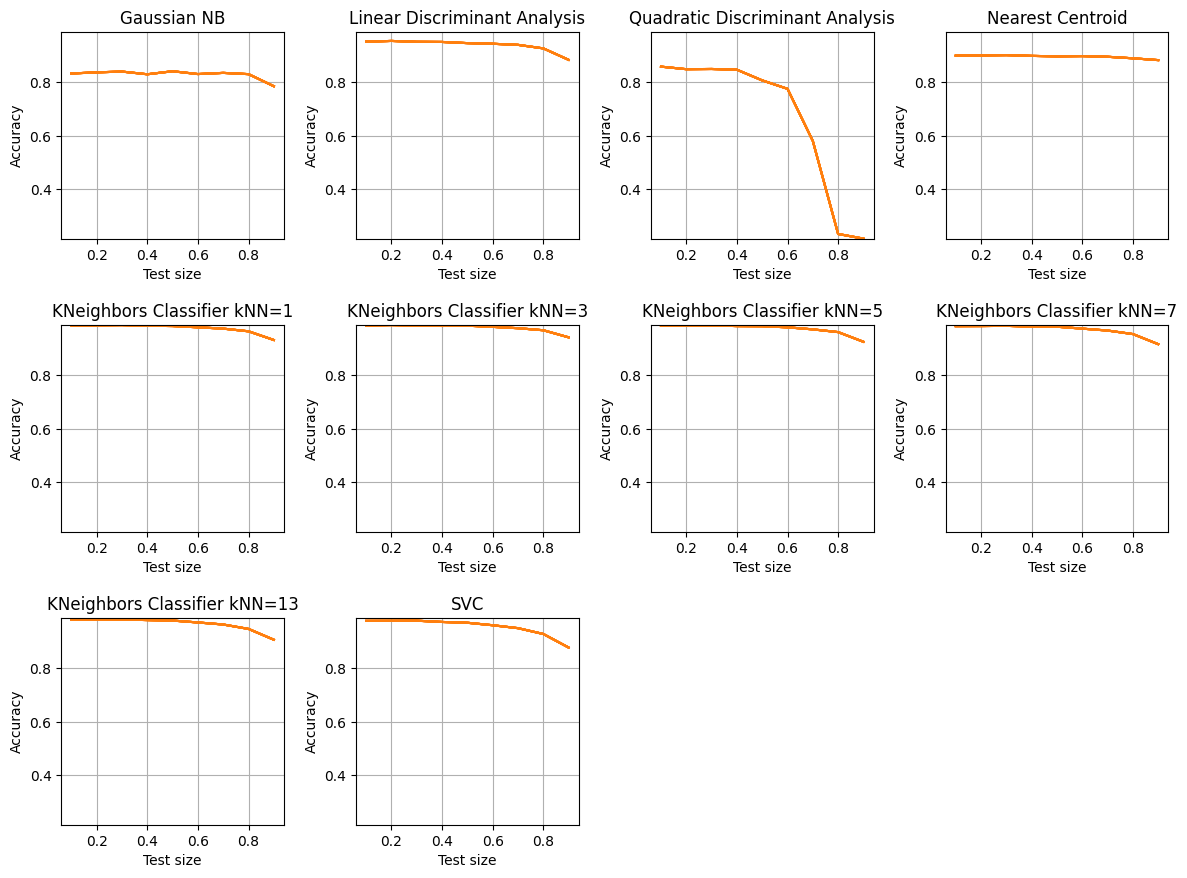

In [23]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Plotting parameters
n_plots = len(CLASSIFIERS)
n_cols = 4
n_rows = int(np.ceil(n_plots/n_cols))
plt.figure(figsize=(3*n_cols, 3*n_rows))

for i, t_size in enumerate(TEST_SIZE):
    for j, classifier in enumerate(CLASSIFIERS):
        plt.subplot(n_rows, n_cols, j+1)
        plt.plot(TEST_SIZE, accuracy_matrix[:,j], 'C1')
        plt.ylim([np.min(accuracy_matrix), np.max(accuracy_matrix)])
        plt.grid(True)
        plt.ylabel("Accuracy")
        plt.xlabel("Test size")
        plt.title(CLASSIFIERS_DOCSTR[j])

plt.tight_layout(pad=1.5)
plt.show()

### Confusion matrix
---


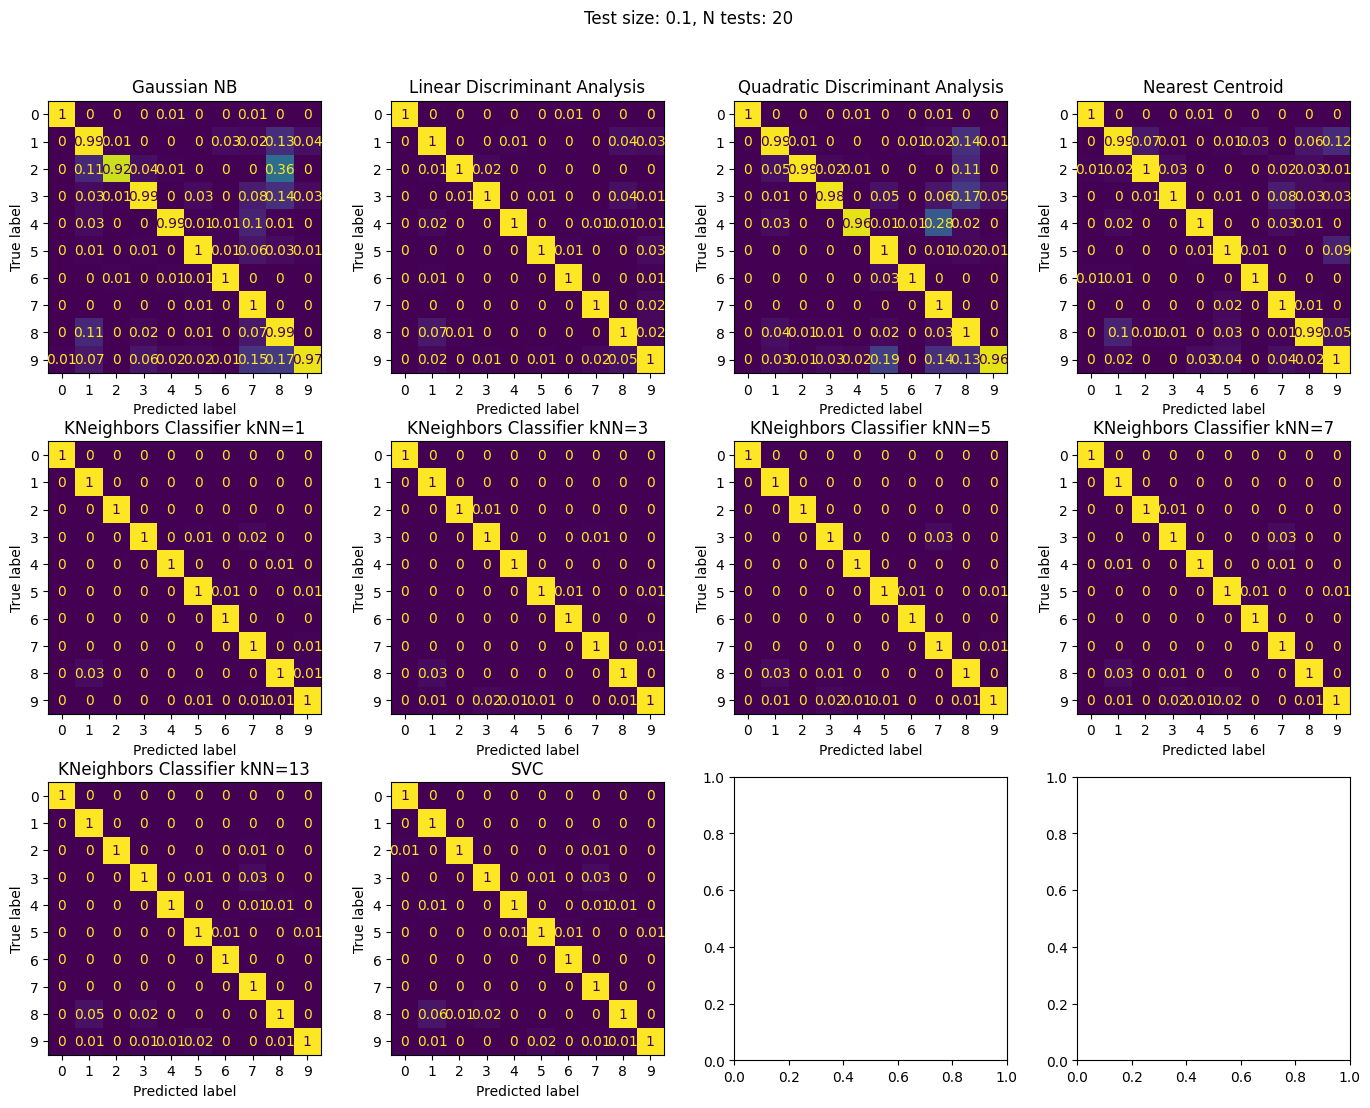

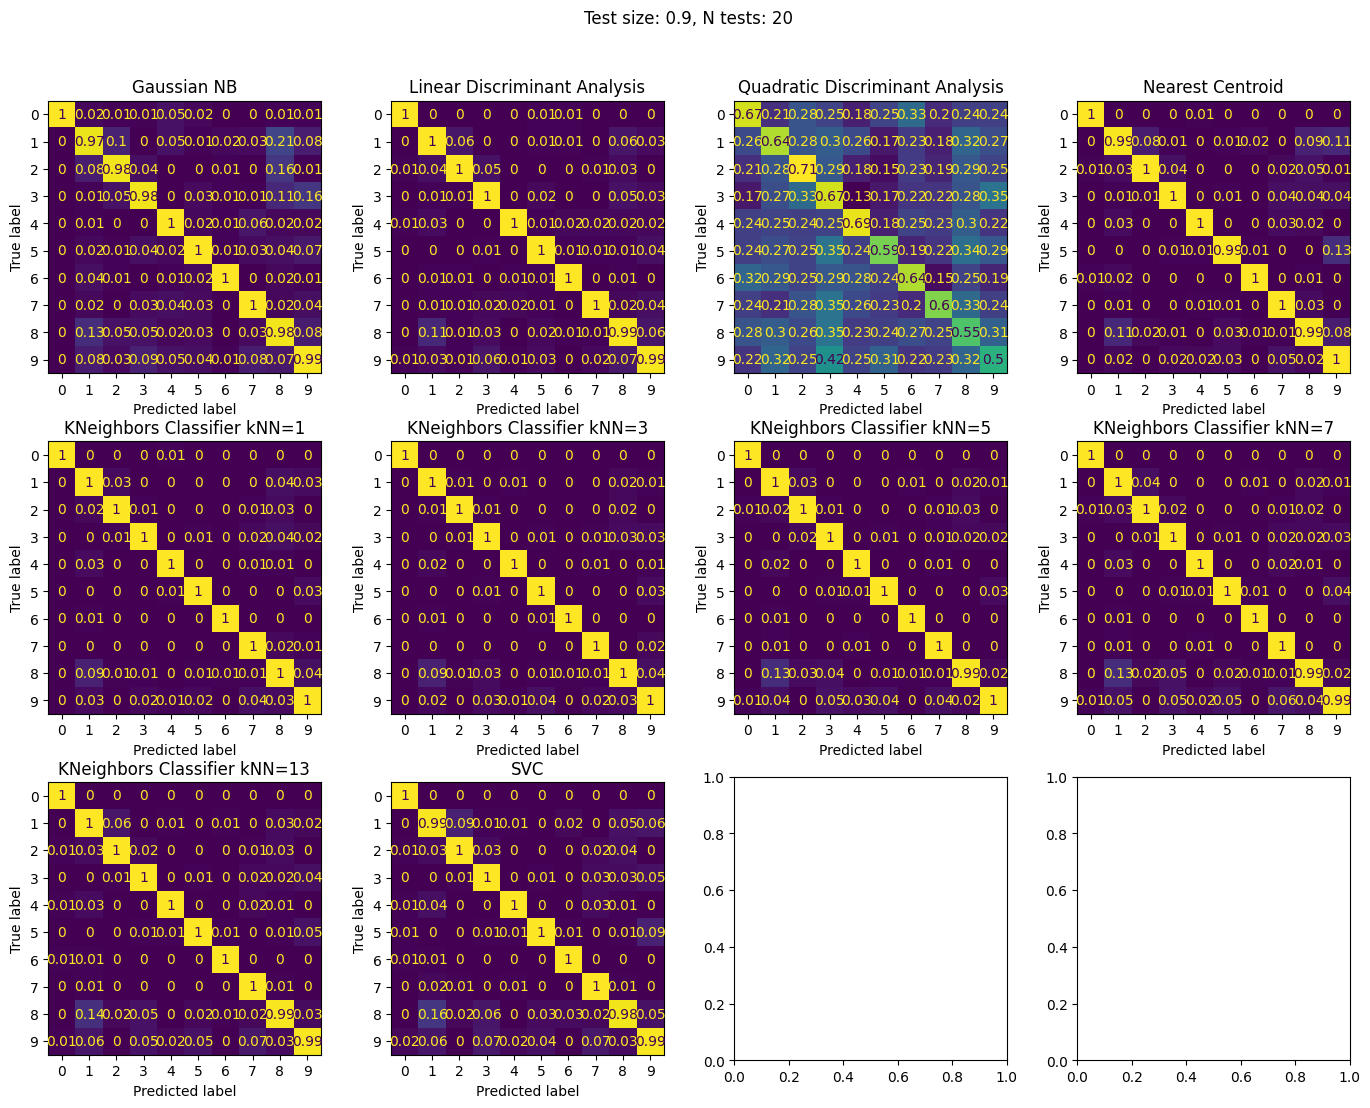

In [24]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn import metrics

# Select display test size variant
#disp_test_size = TEST_SIZE # Default, for display all confusion matrix
disp_test_size = [TEST_SIZE[0], TEST_SIZE[-1]]

# Plotting parameters
n_plots = len(CLASSIFIERS)
n_cols = 4
n_rows = int(np.ceil(n_plots/n_cols))


# Dla każdego rozmiaru danych testowych
for i, t_size in enumerate(TEST_SIZE):
    if t_size not in disp_test_size:
        continue
    fig, ax = plt.subplots(n_rows,n_cols)
    fig.set_size_inches(3.5*n_cols, 3.5*n_rows)
    fig.tight_layout(pad=2)
    fig.suptitle("Test size: {}, N tests: {}".format(t_size, N_ITER), y=1.05)

    # Dla każdego klasyfikatora
    for j, classifier in enumerate(CLASSIFIERS):
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confiusion_matrix[i,j,:,:], display_labels=digits.target_names)
        disp.plot(ax=ax[j//n_cols, j%n_cols])
        ax[j//n_cols, j%n_cols].set_title(CLASSIFIERS_DOCSTR[j])
        disp.im_.colorbar.remove()


    plt.show()


## Conclusions
---

# PCA Transform
---

In [51]:
def stack_cast_matrix(eigen_pair: list, shape_bound: int):
    """
    Stack in sequence horizontally (column wise) first rows from `eigen_pair`
    number of rows limited by `shape_bound`.

    Args:
        eigen_pair (list): Eigen value and eigen vector sorted by eigen value.
        shape_bound (int): Limits of shape.

    Returns:
        cast_matrix (np.ndarray): Cast PCA array
    """
    cast_matrix = np.zeros((len(eigen_pair), shape_bound))
    for i in range(shape_bound):
        cast_matrix[:,i] = eigen_pair[i][1]
    return cast_matrix


def pca_cast_matrix(X_std: np.ndarray, var_bound: float = 0.8, shape_bound: int = None, return_var: bool = False):
    """
    Function estimate PCA cast_matrix.

    Args:
        X_std (np.ndarray): Data 
        var_bound (float, optional): Variance bound in range `0...1`. Defaults to 0.8.
        shape_bound (int, optional): Shape bound (transform shape). Defaults to None.
        return_var (bool, optional): If true function return `cast_matrix`, [`var_exp`, `cum_var_exp`]. Defaults to False.

    Returns:
        cast_matrix (np.ndarray): PCA casting matrix
    """
    
    # EVD
    cov_mat = np.cov(X_std.T)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat) 

    sum_eigen_values = sum(eigen_values)
    var_exp = [(eigen_val/sum_eigen_values) 
                for eigen_val in sorted(eigen_values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)

    # Grouping 
    eigen_pair = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_vectors))]
    eigen_pair.sort(key=lambda k:k[0], reverse=True)
    
    #Cast matrix
    if shape_bound != None:
        cast_matrix = stack_cast_matrix(eigen_pair, shape_bound)
    else:
        # Wartość sumowaniej wariancji 
        shape_bound = np.argmax(cum_var_exp > var_bound)
        cast_matrix = stack_cast_matrix(eigen_pair, shape_bound)

    if not return_var:
        return cast_matrix
    
    return cast_matrix, [var_exp, cum_var_exp]

## 3D visualization after transformation
---
This section is only for visualization results after PCA transform with `shape_bound` = 3 .

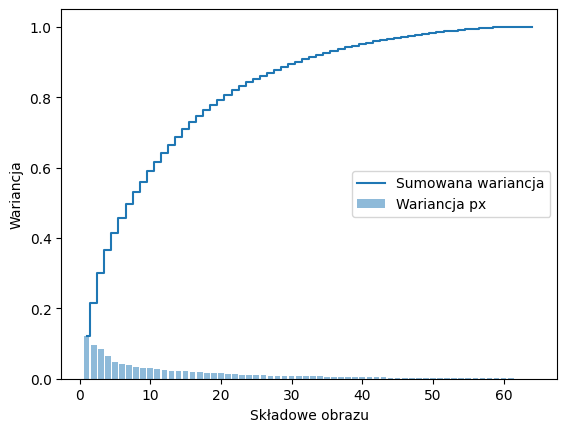

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

# Read data
digits_data, digits_target = load_digits(return_X_y=True)

# Normalize data for PCA
digits_data_std = StandardScaler().fit_transform(digits_data)

# PCA method
cast_matrix, [var_exp, cum_var_exp] = pca_cast_matrix(digits_data_std, shape_bound=3, return_var=True)
digits_data_std_pca = digits_data_std.dot(cast_matrix)

# Display 3D plot
df = pd.DataFrame({'index':range(digits_data_std_pca.shape[0]), 
                   'd1': digits_data_std_pca[:,0],
                   'd2': digits_data_std_pca[:,1],
                   'd3': digits_data_std_pca[:,2],
                   'number': [str(y) for y in digits_target]})

df = df.sort_values(by=['number'])

fig = px.scatter_3d(df, x = 'd1',
                        y = 'd2',
                        z = 'd3',
                        color = 'number')

fig.update_traces(marker_size = 4)
fig.show()

# Display variance
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='Wariancja px')
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where='mid', label='Sumowana wariancja')
plt.legend(loc='right')
plt.xlabel('Składowe obrazu')
plt.ylabel('Wariancja')
plt.show()

In [69]:
from sklearn import metrics

def classifier_test(classifier_model, X_train, X_test, y_train, y_test):
    """
    Classifier testing function

    Args:
        classifier_model (class): Classifier class
        X_train (np.ndarray): Training set
        X_test (np.ndarray): Testing set
        y_train (np.ndarray): Training target
        y_test (np.ndarray): Testing target

    Returns:
        [acc, cm] (list): _description_
    """

    # Uczenie modelu
    classifier_model.fit(X_train, y_train)
    
    # Predykcja
    y_pred = classifier_model.predict(X_test)
    
    # Jakość klasyfikacji
    acc = metrics.accuracy_score(y_test, y_pred)

    # Macierz pomyłek
    cm = metrics.confusion_matrix(y_test, y_pred, labels=classifier_model.classes_)

    return acc, cm
    

## Configuration section
---
Here you should specify: 
- number of iteration `N_ITER`
- test size array `TEST_SIZE`
- classificators used to test `CLASSIFIERS`, and for titles `CLASSIFIERS_DOCSTR`



In [75]:
# Import all required classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

VARIANCE_BOUND = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Variance Bound
TESTING_SIZE = 0.3                               # Testing `test_size` parameter
N_ITER = 2                                       # Number of iterations for all tests
                             

# Classifiers
K_NEIGHBORS = [1,3,5,7,13]
CLASSIFIERS = [
    GaussianNB(), 
    LinearDiscriminantAnalysis(), 
    QuadraticDiscriminantAnalysis(),
    NearestCentroid(),
    SVC(),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[0]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[1]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[2]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[3]),
    KNeighborsClassifier(n_neighbors=K_NEIGHBORS[4]),
    ]

CLASSIFIERS_DOCSTR = [
    "Gaussian NB",
    "Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis",
    "Nearest Centroid",
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[0]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[1]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[2]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[3]),
    "KNeighbors Classifier kNN={}".format(K_NEIGHBORS[4]),
    "SVC"
]

## Run section
---
Here you can run simlations. This may take a while.

In [85]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.datasets import load_digits
from tqdm import tqdm
import numpy as np

# TODO Check warning
import warnings
warnings.filterwarnings('ignore')

# Read digits data
digits = load_digits()
n_classes = len(digits.target_names)

# Memory allocation
accuracy_matrix = np.zeros( ( len(VARIANCE_BOUND), len(CLASSIFIERS) ) ) 
confiusion_matrix = np.zeros( ( len(VARIANCE_BOUND), len(CLASSIFIERS), n_classes, n_classes ) ) 
n_features = np.zeros((len(VARIANCE_BOUND), 1))

# For each size of `VARIANCE_BOUND`
for i, var_bound in enumerate(VARIANCE_BOUND):
    print("{:-^50}".format("Test {}".format(i+1)))
    print("Parameters: test size: {}, n_times: {}".format(t_size, N_ITER))

    # For N iterations
    for k in tqdm(range(N_ITER)):

        # Shuffle and roll test size
        X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=TEST_SIZE)
        
        # Normalize data for PCA
        sc = StandardScaler()
        X_train_std = sc.fit_transform(X_train)
        X_test_std  = sc.transform(X_test) 

        # PCA method
        cast_matrix = pca_cast_matrix(X_train_std, var_bound = var_bound)
        X_train_std_pca = X_train_std.dot(cast_matrix)
        X_test_std_pca  = X_test_std.dot(cast_matrix)

        n_features[i] += cast_matrix.shape[1]

        # For each classifier
        for j, classifier in enumerate(CLASSIFIERS):
            accuracy, confiusion_m = classifier_test(classifier, X_train_std_pca, X_test_std_pca, y_train, y_test)
            # Adding evaluation statistics
            accuracy_matrix[i,j] += accuracy
            confiusion_matrix[i,j,:,:] += confiusion_m

# Normalize evaluation statistics
accuracy_matrix /= N_ITER
n_features /= N_ITER

for i in range(confiusion_matrix.shape[0]):
    for j in range(confiusion_matrix.shape[1]):
        confiusion_matrix[i,j,:,:] = np.round(normalize(confiusion_matrix[i,j,:,:]),2)

----------------------Test 1----------------------
Parameters: test size: 0.5, n_times: 2


100%|██████████| 2/2 [00:00<00:00,  4.85it/s]


----------------------Test 2----------------------
Parameters: test size: 0.6, n_times: 2


100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


----------------------Test 3----------------------
Parameters: test size: 0.7, n_times: 2


100%|██████████| 2/2 [00:00<00:00,  4.01it/s]


----------------------Test 4----------------------
Parameters: test size: 0.8, n_times: 2


100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


----------------------Test 5----------------------
Parameters: test size: 0.9, n_times: 2


100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


## Display section
---

### Accuracy plot

[[ 6.5]
 [ 9.5]
 [14. ]
 [19.5]
 [29.5]]


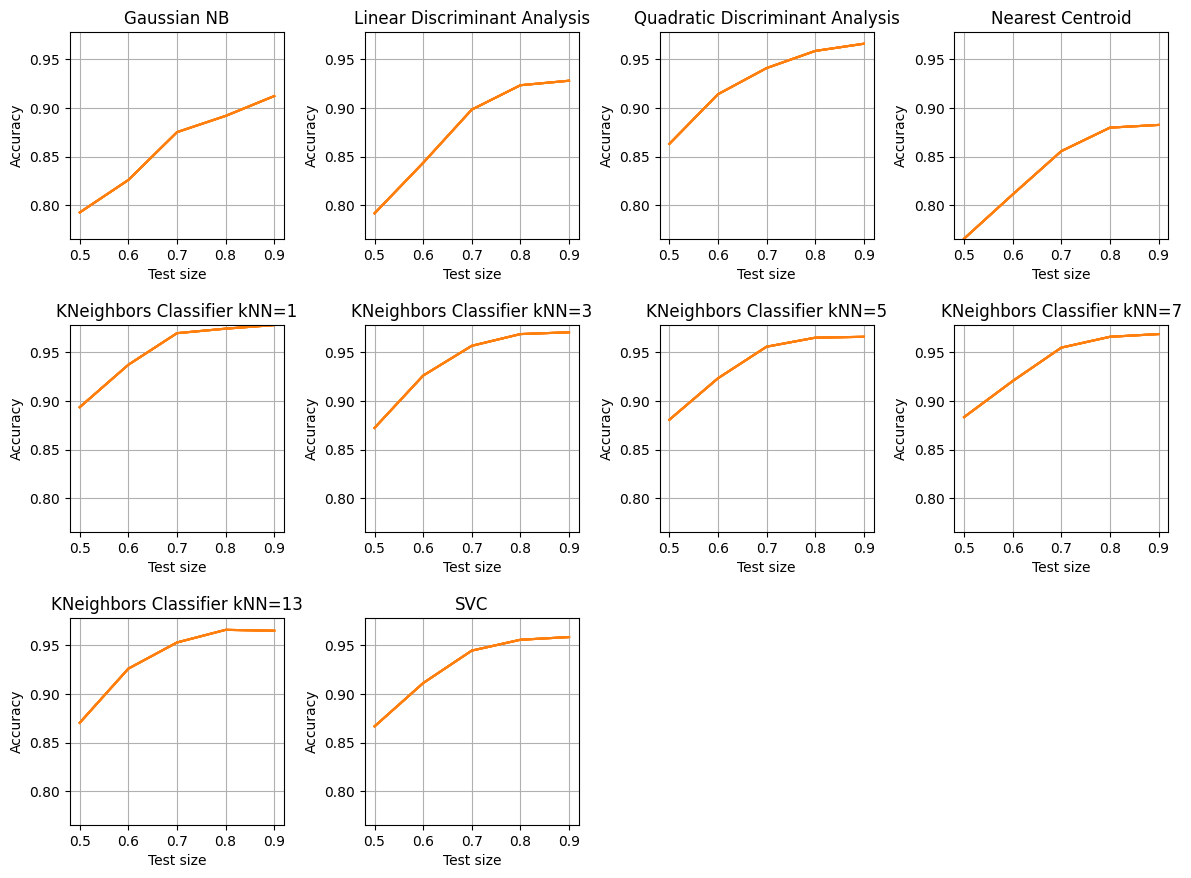

In [89]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

print(list_of_number)

# Plotting parameters
n_plots = len(CLASSIFIERS)
n_cols = 4
n_rows = int(np.ceil(n_plots/n_cols))
plt.figure(figsize=(3*n_cols, 3*n_rows))

for i, t_size in enumerate(TEST_SIZE):
    for j, classifier in enumerate(CLASSIFIERS):
        plt.subplot(n_rows, n_cols, j+1)
        plt.plot(TEST_SIZE, accuracy_matrix[:,j], 'C1')
        plt.ylim([np.min(accuracy_matrix), np.max(accuracy_matrix)])
        plt.grid(True)
        plt.ylabel("Accuracy")
        plt.xlabel("Test size")
        plt.title(CLASSIFIERS_DOCSTR[j])

plt.tight_layout(pad=1.5)
plt.show()

### Confusion matrix
---


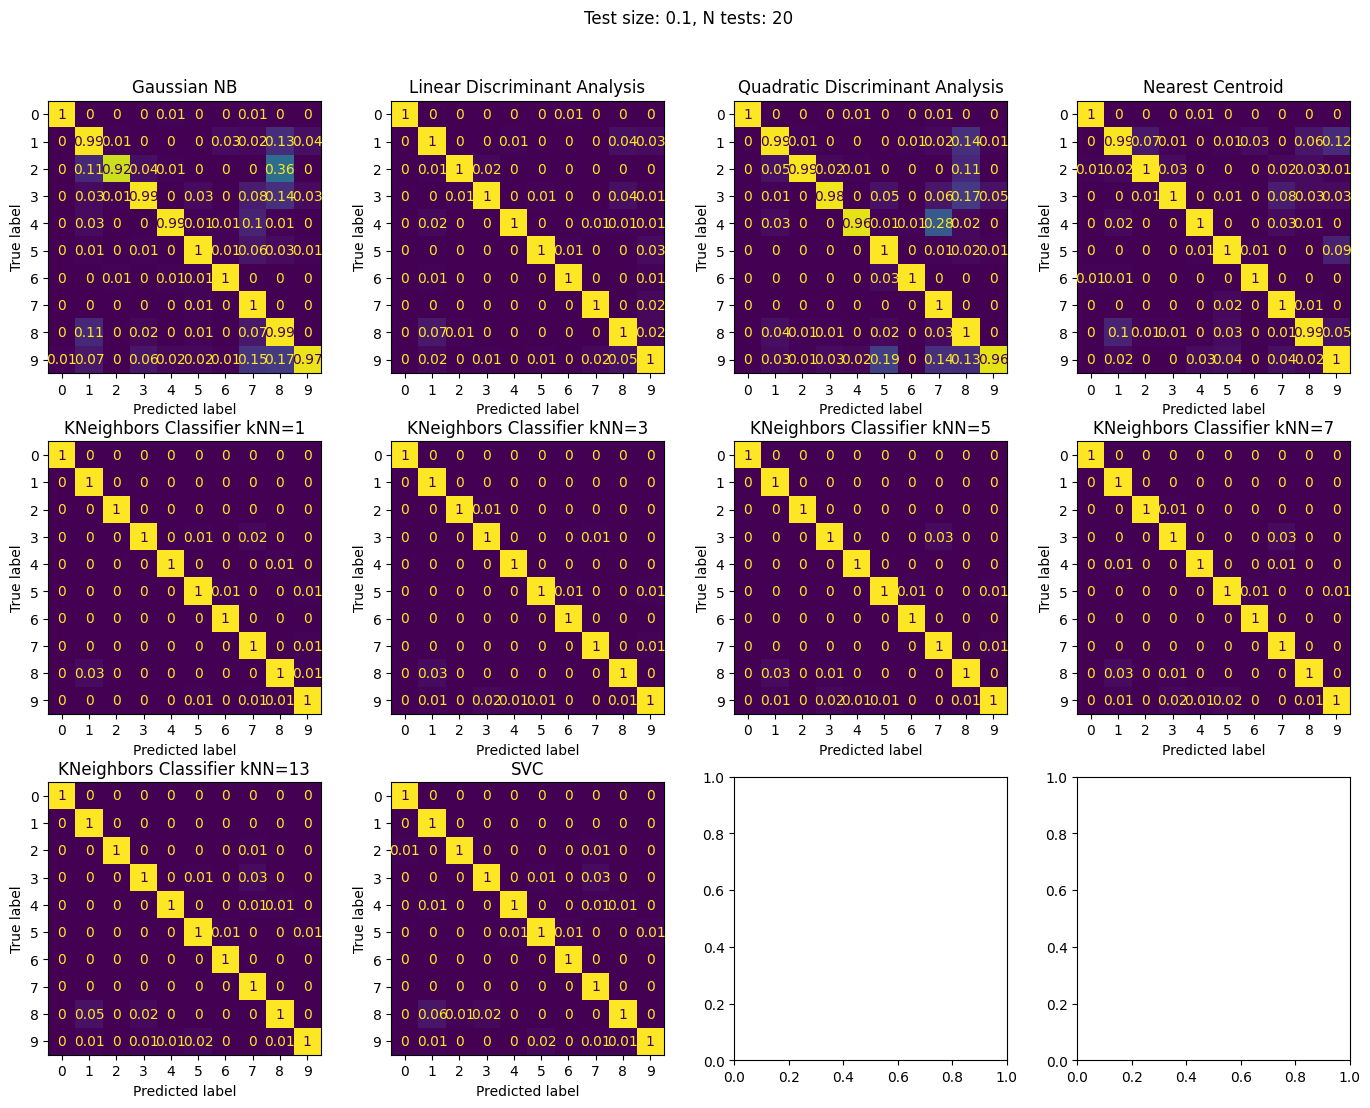

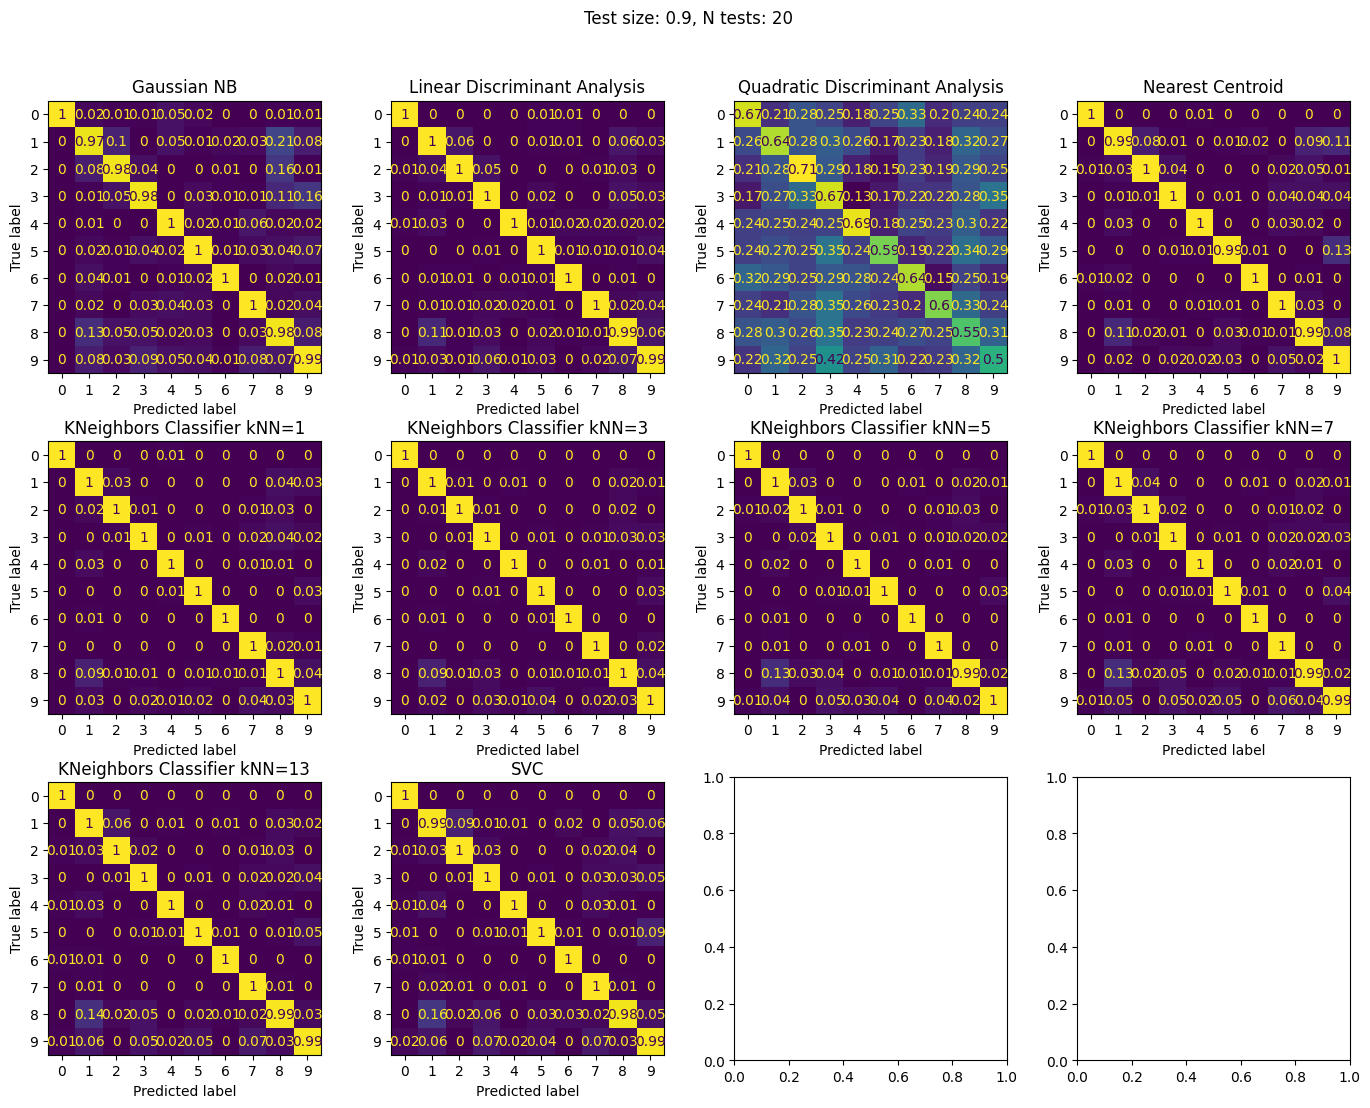

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn import metrics

# Select display test size variant
#disp_test_size = TEST_SIZE # Default, for display all confusion matrix
disp_test_size = [TEST_SIZE[0], TEST_SIZE[-1]]

# Plotting parameters
n_plots = len(CLASSIFIERS)
n_cols = 4
n_rows = int(np.ceil(n_plots/n_cols))


# Dla każdego rozmiaru danych testowych
for i, t_size in enumerate(TEST_SIZE):
    if t_size not in disp_test_size:
        continue
    fig, ax = plt.subplots(n_rows,n_cols)
    fig.set_size_inches(3.5*n_cols, 3.5*n_rows)
    fig.tight_layout(pad=2)
    fig.suptitle("Test size: {}, N tests: {}".format(t_size, N_ITER), y=1.05)

    # Dla każdego klasyfikatora
    for j, classifier in enumerate(CLASSIFIERS):
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confiusion_matrix[i,j,:,:], display_labels=digits.target_names)
        disp.plot(ax=ax[j//n_cols, j%n_cols])
        ax[j//n_cols, j%n_cols].set_title(CLASSIFIERS_DOCSTR[j])
        disp.im_.colorbar.remove()


    plt.show()


## Conclusions
---